## 1. 크롤링한 데이터에서 사진링크 저장하기

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

In [ ]:
# 한 행마다 여러 장의 사진이 ,로 구분되어 있음
def seperate_each_images(csv_file, image_column):
    df = pd.read_csv(csv_file)
    df.dropna(subset=['imageurl'], inplace=True)
    df.reset_index(drop=True, inplace=True)  # 인덱스 재설정

     # 결과를 저장할 빈 DataFrame 생성
    new_df = pd.DataFrame(columns=['imageurl'])

    for index in range(len(df[image_column])):
        # 여러 개의 이미지 URL이 쉼표로 구분되어 있으므로 이를 분리
        image_urls = df.loc[index, image_column].split(',')

        # split한 URL들을 new_df에 저장
        for url in image_urls:
            new_df = new_df.append({'imageurl': url.strip()}, ignore_index=True)  # .strip()으로 양쪽 공백 제거

    # 결과 DataFrame을 csv 파일로 저장
    new_df.to_csv('./drive/MyDrive/playdata_data/final_prj/seperated_images.csv', index=False)

    return new_df

csv_file = './drive/MyDrive/playdata_data/final_prj/phone_image.csv'  # CSV 파일 경로
image_column = 'imageurl'  # 이미지 URL이 있는 열 이름

seperate_each_images(csv_file, image_column)

,imageurl
0,https://img2.joongna.com/cafe-article-data/liv...
1,https://img2.joongna.com/cafe-article-data/liv...
2,https://img2.joongna.com/cafe-article-data/liv...
3,https://img2.joongna.com/cafe-article-data/liv...
4,https://img2.joongna.com/cafe-article-data/liv...
...,...
193218,https://img2.joongna.com/cafe-article-data/liv...
193219,https://img2.joongna.com/cafe-article-data/liv...
193220,https://img2.joongna.com/media/original/2023/0...
193221,https://img2.joongna.com/cafe-article-data/liv...


In [ ]:
import csv
import requests

def download_images_from_csv(csv_file, image_column, save_directory):
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)  # 각 행별 딕셔너리 형태로 반환 {'imageurl': '...', 'keyword': '...'}

        image_count = 1  # 카운터 변수 초기화

        for row in reader:
            image_url = row[image_column]
            try:
                response = requests.get(image_url, stream=True)
                response.raise_for_status()

                # 이미지 파일명 설정
                image_name = f"image_{image_count}.jpg"

                # 이미지 파일 저장 경로 설정
                save_path = f"{save_directory}/{image_name}"
                with open(save_path, 'wb') as image_file:
                    for chunk in response.iter_content(chunk_size=8192):
                        image_file.write(chunk)
                print(f"Downloaded: {image_name}")

                image_count += 1  # 다음 이미지를 위해 카운터 증가

            except requests.exceptions.HTTPError as e:
                print(f"Failed to download: {image_url}, Error: {str(e)}")

            except Exception as e:
                print(f"An error occurred while downloading: {image_url}, Error: {str(e)}")

csv_file = './drive/MyDrive/playdata_data/final_prj/seperated_images.csv'  # CSV 파일 경로
image_column = 'imageurl'  # 이미지 URL이 있는 열 이름
save_directory = './drive/MyDrive/playdata_data/final_prj/images'  # 이미지를 저장할 디렉토리

download_images_from_csv(csv_file, image_column, save_directory)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Downloaded: image_5868.jpg
Downloaded: image_5869.jpg
Downloaded: image_5870.jpg
Downloaded: image_5871.jpg
Downloaded: image_5872.jpg
Downloaded: image_5873.jpg
Downloaded: image_5874.jpg
Downloaded: image_5875.jpg
Downloaded: image_5876.jpg
Downloaded: image_5877.jpg
Downloaded: image_5878.jpg
Downloaded: image_5879.jpg
Downloaded: image_5880.jpg
Downloaded: image_5881.jpg
Downloaded: image_5882.jpg
Downloaded: image_5883.jpg
Downloaded: image_5884.jpg
Downloaded: image_5885.jpg
Downloaded: image_5886.jpg
Downloaded: image_5887.jpg
Downloaded: image_5888.jpg
Downloaded: image_5889.jpg
Downloaded: image_5890.jpg
Downloaded: image_5891.jpg
Downloaded: image_5892.jpg
Downloaded: image_5893.jpg
Downloaded: image_5894.jpg
Downloaded: image_5895.jpg
Downloaded: image_5896.jpg
Downloaded: image_5897.jpg
Downloaded: image_5898.jpg
Downloaded: image_5899.jpg
Downloaded: image_5900.jpg
Downloaded: image_5901.jpg
Downloaded: image_5902.jpg
Downloaded: image_5

OSError: ignored

## 2. 이미지 시각화

In [62]:
## 라이브러리 불러오기
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [63]:
## 데이터 불러오기
dir_data = './drive/MyDrive/playdata_data/final_prj/train_front/front_quality.json'
image_path = './drive/MyDrive/playdata_data/final_prj/train_front/'

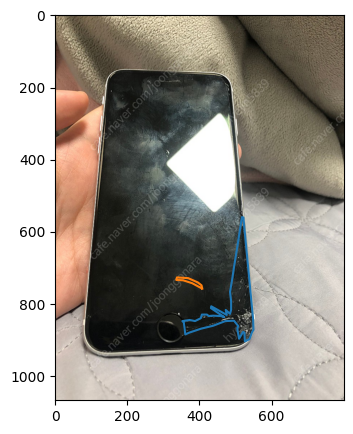

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# JSON 파일 로드
with open(dir_data) as f:
    data = json.load(f)

# image_6236.jpg224218에 대한 데이터를 가져옴
image_data = data['image_6236.jpg224218']

# 이미지 불러오기
img = mpimg.imread(image_path + image_data['filename'])


# 그림의 크기를 설정합니다.
plt.figure(figsize=(5,5))

# 이미지를 먼저 그림
plt.imshow(img)

for region in image_data['regions']:
    # 각 영역의 x와 y 좌표를 추출
    x_points = region['shape_attributes']['all_points_x']
    y_points = region['shape_attributes']['all_points_y']

    # 그림에 세그먼트를 추가
    plt.plot(x_points, y_points)

plt.show()

### 한 이미지 내의 픽셀 값 분포 확인

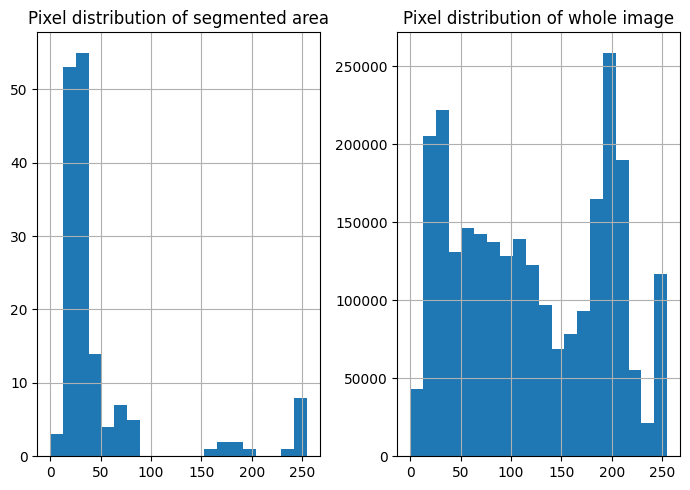

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def show_pixel_distribution(json_file_path, image_folder_path, image_key):
    # JSON 파일 로드
    with open(json_file_path) as f:
        data = json.load(f)

    # 주어진 키에 대한 데이터를 가져옴
    image_data = data[image_key]

    # 이미지 불러오기
    img = mpimg.imread(image_folder_path + image_data['filename'])

    # 빈 리스트를 만들어 세그멘테이션 된 픽셀 값 저장
    segmented_pixels = []

    for region in image_data['regions']:
        # 각 영역의 x와 y 좌표를 추출
        x_points = region['shape_attributes']['all_points_x']
        y_points = region['shape_attributes']['all_points_y']

        # 해당 세그먼테이션 영역의 픽셀 값을 저장
        for x, y in zip(x_points, y_points):
            segmented_pixels.append(img[y, x])

    segmented_pixels = np.array(segmented_pixels)

    # 그림 크기 설정
    plt.figure(figsize=(7,5))

    plt.subplot(121)
    plt.hist(segmented_pixels.flatten(), bins=20)
    plt.title('Pixel distribution of segmented area')
    plt.grid(True)  # 그래프에 그리드 추가

    plt.subplot(122)
    plt.hist(img.flatten(), bins=20)
    plt.title('Pixel distribution of whole image')
    plt.grid(True)  # 그래프에 그리드 추가

    plt.tight_layout()
    plt.show()

show_pixel_distribution(dir_data, image_path, 'image_6236.jpg224218')


## 3. 이미지 전처리

In [52]:
import torchvision

in_channels : 특성 맵의 채널 수 ex. in_channels = 3 (RGB) <br>
out_channels : 합성곱 층의 특성 맵의 채널 수 <br>
kernel_size : 합성곱 필터 크기 ex. kernel_size=3 (필터의 너비와 높이가 모두 3픽셀) <br>
stride: 합성곱 필터가 입력 이미지/특성 맵 위에서 이동하는 간격 ex. stride=1 (필터는 매번 한 픽셀씩 이동) <br>
padding: 입력 이미지/특성 맵 주변에 추가되는 "0"의 수 (크기 감소 방지 + 이미지의 가장자리 정보 유살 방지) <br>
bias : 편향값 ex. bias=True (각 출력 채널에 대한 편향 값이 학습되고 합성곱 결과에 추가)

모델 구축

In [64]:
## 라이브러리 불러오기
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

from torchvision import transforms, datasets

## UNet 모델 구조 구축하기
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # 첫 번째 매개변수를 3으로 변경 (RGB)
        self.conv1 = nn.Conv2d(3, 64, 3)

        # Convolution(합성곱) + BatchNormalization(배치정규화) + Relu(활성화 함수) 정의하기
        def CBR2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):
            layers = []
            layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                 kernel_size=kernel_size, stride=stride, padding=padding,
                                 bias=bias)]
            layers += [nn.BatchNorm2d(num_features=out_channels)]
            layers += [nn.ReLU()]

            cbr = nn.Sequential(*layers)

            return cbr

        # 수축 경로(Contracting path) : 이미지에서 특징을 추출
        self.enc1_1 = CBR2d(in_channels=3, out_channels=64)  # 여기 수정
        self.enc1_2 = CBR2d(in_channels=64, out_channels=64)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.enc2_1 = CBR2d(in_channels=64, out_channels=128)
        self.enc2_2 = CBR2d(in_channels=128, out_channels=128)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.enc3_1 = CBR2d(in_channels=128, out_channels=256)
        self.enc3_2 = CBR2d(in_channels=256, out_channels=256)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.enc4_1 = CBR2d(in_channels=256, out_channels=512)
        self.enc4_2 = CBR2d(in_channels=512, out_channels=512)

        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.enc5_1 = CBR2d(in_channels=512, out_channels=1024)

        # 확장 경로(Expansive path) : 특징 맵을 원본 이미지와 동일한 해상도로 업샘플링 + 위치 정보 보존
        self.dec5_1 = CBR2d(in_channels=1024, out_channels=512)

        self.unpool4 = nn.ConvTranspose2d(in_channels=512, out_channels=512,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec4_2 = CBR2d(in_channels=2 * 512, out_channels=512)
        self.dec4_1 = CBR2d(in_channels=512, out_channels=256)

        self.unpool3 = nn.ConvTranspose2d(in_channels=256, out_channels=256,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec3_2 = CBR2d(in_channels=2 * 256, out_channels=256)
        self.dec3_1 = CBR2d(in_channels=256, out_channels=128)

        self.unpool2 = nn.ConvTranspose2d(in_channels=128, out_channels=128,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec2_2 = CBR2d(in_channels=2 * 128, out_channels=128)
        self.dec2_1 = CBR2d(in_channels=128, out_channels=64)

        self.unpool1 = nn.ConvTranspose2d(in_channels=64, out_channels=64,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec1_2 = CBR2d(in_channels=2 * 64, out_channels=64)
        self.dec1_1 = CBR2d(in_channels=64, out_channels=64)

        # self.fc = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, stride=1, padding=0, bias=True)
        # 확률로 결과 뽑기
        self.fc = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, stride=1, padding=0, bias=True),
            nn.Sigmoid()
        )

    # forward 함수 정의하기 (모델 실행)
    def forward(self, x):
        enc1_1 = self.enc1_1(x)
        enc1_2 = self.enc1_2(enc1_1)
        pool1 = self.pool1(enc1_2)

        enc2_1 = self.enc2_1(pool1)
        enc2_2 = self.enc2_2(enc2_1)
        pool2 = self.pool2(enc2_2)

        enc3_1 = self.enc3_1(pool2)
        enc3_2 = self.enc3_2(enc3_1)
        pool3 = self.pool3(enc3_2)

        enc4_1 = self.enc4_1(pool3)
        enc4_2 = self.enc4_2(enc4_1)
        pool4 = self.pool4(enc4_2)

        enc5_1 = self.enc5_1(pool4)

        dec5_1 = self.dec5_1(enc5_1)

        unpool4 = self.unpool4(dec5_1)
        cat4 = torch.cat((unpool4, enc4_2), dim=1)
        dec4_2 = self.dec4_2(cat4)
        dec4_1 = self.dec4_1(dec4_2)

        unpool3 = self.unpool3(dec4_1)
        cat3 = torch.cat((unpool3, enc3_2), dim=1)
        dec3_2 = self.dec3_2(cat3)
        dec3_1 = self.dec3_1(dec3_2)

        unpool2 = self.unpool2(dec3_1)
        cat2 = torch.cat((unpool2, enc2_2), dim=1)
        dec2_2 = self.dec2_2(cat2)
        dec2_1 = self.dec2_1(dec2_2)

        unpool1 = self.unpool1(dec2_1)
        cat1 = torch.cat((unpool1, enc1_2), dim=1)
        dec1_2 = self.dec1_2(cat1)
        dec1_1 = self.dec1_1(dec1_2)

        x = self.fc(dec1_1)

        return x

[1] 데이터 로드 및 전처리

In [65]:
import json
from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from collections import Counter
from torch import nn
from torch import optim
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, data, transform=None, target_transform=None, root_dir=None):
        self.data = list(data.values())
        self.transform = transform
        self.target_transform = target_transform
        self.root_dir = root_dir  # 이미지 파일들이 저장된 폴더의 경로를 저장

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]

        # 이미지 파일 불러오기
        # self.root_dir과 JSON에서 불러온 상대 경로를 붙여서 이미지 파일의 절대 경로를 생성
        image_path = os.path.join(self.root_dir, item['filename'])
        image = Image.open(image_path)

        # 이미지를 텐서로 변환하고, 필요하다면 전처리를 적용
        if self.transform:
            image = self.transform(image)

        # 'regions' 내 'status'를 기반으로 라벨 생성
        status = item['regions'][0]['region_attributes']['status']
        label_dict = {"normal": 0, "nomal":0,"shallow_scratch": 1,
                      "deep_scratch": 2, "dent": 3, "spacing" : 4}  # 라벨을 숫자 형태로 변환하는 딕셔너리
        label = label_dict[status]


        # 레이블 정보 추출
        regions = item['regions']

        # 레이블 이미지를 저장할 배열 생성
        label_array = np.zeros((256, 256), dtype=np.uint8)

        # 각 영역에 대한 마스크 생성
        for region in regions:
            # 다각형의 꼭짓점 좌표 추출
            all_points_x = region['shape_attributes']['all_points_x']
            all_points_y = region['shape_attributes']['all_points_y']

            # PIL의 ImageDraw를 사용해서 다각형의 내부를 채우는 방법
            mask_img = Image.new('L', (256, 256))  # 'L': 8-bit pixels, black and white
            ImageDraw.Draw(mask_img).polygon(list(zip(all_points_x, all_points_y)), outline=1, fill=1)

            # 생성한 마스크를 label_array에 더함
            label_array += np.array(mask_img)

        # 최종 레이블 이미지를 PIL Image로 변환
        label_image = Image.fromarray(label_array)

        # 레이블 이미지를 텐서로 변환
        # 1차원 -> [1, height, width] 형태의 텐서로 변환되어 UNet의 출력 형태와 일치
        if self.target_transform:
            label_tensor = self.target_transform(label_image)

        # label_path = os.path.join(self.root_dir, item['filename'])
        # label_image = Image.open(label_path)
        # label_tensor = transforms.ToTensor()(label_image)

        # return image, label
        # 튜플로 반환
        return {'input': image, 'label': label_tensor}

[1] - 이미지 크기 전처리

In [44]:
# 이미지 크기를 동일하게 조절하기 위해 내 데이터셋 특성 파악

from PIL import Image
import os

image_dir = './drive/MyDrive/playdata_data/final_prj/train_front/'  # 이미지 폴더
image_files = os.listdir(image_dir)  # 이미지 폴더 내의 모든 파일

widths = []
heights = []

for image_file in image_files:
    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # 이미지 파일만 처리
        with Image.open(os.path.join(image_dir, image_file)) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)

print(f"Average width: {sum(widths)/len(widths)}")
print(f"Average height: {sum(heights)/len(heights)}")
print(f"Max width: {max(widths)}")
print(f"Max height: {max(heights)}")

Average width: 902.734693877551
Average height: 1083.1836734693877
Max width: 4032
Max height: 3024


In [45]:
# # UNet은 보통 2의 제곱수로 구성된 입력을 요구
# ex. 128x128, 256x256, 512x512 등
# - 이유 : UNet의 인코딩 및 디코딩 과정에서 다양한 풀링 및 업샘플링 단계를 거치기 때문

# 내 이미지 크기 - 이미지의 평균 크기 : 약 900x1080  /  최대 크기 : 4032x3024임

# GPU 메모리가 충분하다면, 1024x1024 크기
# 메모리가 충분하지 않다면, 512x512, 256x256로 이미지로 리사이징

[1] - 이미지가 단채널일 경우 이미치 차원 늘리기 <br>
ex. nomal과 같이 파손 레이블이 없을 경우

In [66]:
# 이미지 차원 수 확인
def expand_if_needed(x):
    if len(x.shape) == 3:
        x = np.expand_dims(x, axis=1)  # Add the channel dimension
    if len(x.shape) != 4:
        raise ValueError(f'Expected a 4D array, got shape {x.shape}')
    if x.shape[1] != 3:
        x = np.repeat(x, 3, axis=1)  # Expand the channel dimension to 3
    if x.shape[1] != 3:
        raise ValueError(f'Expected the second dimension to be 3, got {x.shape[1]}')
    return x

In [45]:
# def expand_if_needed(array):
#   '''
#   이미지가 단채널인지 확인 + 단채널이면 3채널로 늘리기
#   '''
#   #  만약 배열이 이미 3채널이라면, 그대로 반환
#   if array.shape[1] == 3:
#       return array
#   # 만약 배열의 차원이 4차원이 아니라면, None을 반환
#   elif array.ndim != 4:
#       print(f'Unexpected array shape: {array.shape}. Expected 4 dimensions.')
#       return None
#   else:
#       # NHWC -> NCHW로 차원 순서 변경
#       array = np.transpose(array, (0, 3, 1, 2))
#       # 첫 번째 차원(배치 크기 차원)을 유지하고 나머지 3개의 차원에 대해 채널 차원을 확장
#       return np.repeat(array, 3, axis=1)

- NHWC 형식 : (batch_size, height, width, channels) 순서의 차원<br>
- NCHW 형식 : (batch_size, channels, height, width) 순서의 차원

In [12]:
# 데이터 로딩
with open(dir_data, 'r') as f:
    data = json.load(f)

# train, test 분할
keys = list(data.keys())
train_keys, valid_keys = train_test_split(keys, test_size=0.2, random_state=42)

# 데이터 추출
train_data = {key: data[key] for key in train_keys}
valid_data = {key: data[key] for key in valid_keys}

# 전처리 (이미지를 텐서로 변환하는 정규화 전처리)
# 픽셀 값의 범위가 [0, 255]인 8비트 정수에서 [0, 1] 범위의 32비트 부동소수점형 텐서로 변환 (신경망 모델의 입력 형식에 맞추기 위함)
transform = transforms.Compose([transforms.ToTensor()])

# 데이터 최종 정의
train_dataset = CustomDataset(train_data, transform)
valid_dataset = CustomDataset(valid_data, transform)

# DataLoader 정의
# 진행 이유 (1) 데이터셋을 미니배치 형태(가중치 업데이트)로 제공하는 역할
#           (2) 데이터 섞기 + (3) 병렬 처리 지원(데이터를 여러 개의 프로세스 또는 스레드로 동시에 로드)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=5, shuffle=False)

[2] 데이터 재구현 및 시각화

In [ ]:
print(dataset_train)

Label: {'nomal': tensor([1])}


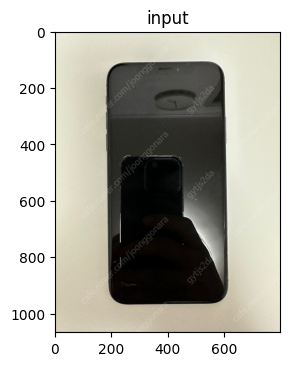

In [7]:
# 데이터로더 잘 구현되었는지 확인
dataset_train = CustomDataset(train_data, transform, root_dir=image_path)  # 수정된 부분
train_loader = DataLoader(dataset_train, batch_size=1, shuffle=False)  # 배치 크기는 1로 설정하여 한 이미지씩 가져옴

# 데이터 로더에서 이미지와 레이블 가져오기
batch = next(iter(train_loader))
input = batch[0]  # 수정된 부분
label = batch[1]  # 수정된 부분

print(f"Label: {label}")

# 불러온 이미지 시각화
plt.subplot(121)
plt.imshow(input.squeeze().numpy().transpose((1,2,0)), cmap='gray')
plt.title('input')

plt.show()


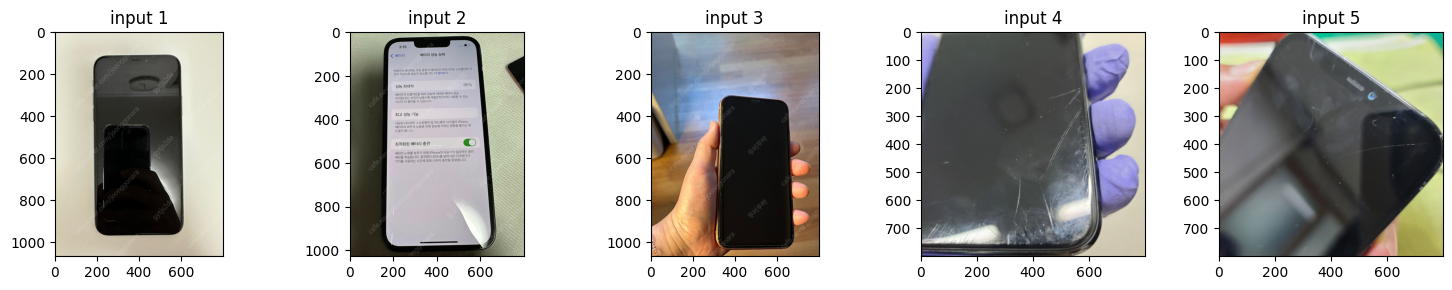

In [ ]:
# 여러 장 확인

# 데이터로더 잘 구현되었는지 확인
dataset_train = CustomDataset(train_data, transform, root_dir=image_path)  # 수정된 부분
train_loader = DataLoader(dataset_train, batch_size=1, shuffle=False)  # 배치 크기는 1로 설정하여 한 이미지씩 가져옴

# 첫 5개의 이미지만 시각화
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i, batch in enumerate(train_loader):
    input = batch[0]  # 수정된 부분
    label = batch[1]  # 수정된 부분

    # 불러온 이미지 시각화
    axs[i].imshow(input.squeeze().numpy().transpose((1,2,0)), cmap='gray')
    axs[i].set_title(f'input {i+1}')

    # 첫 5개의 이미지 이후에는 멈춥니다
    if i >= 4:
        break

plt.tight_layout()
plt.show()

* label(파손 데이터 = 정답데이터) <br>
라벨 딕셔너리의 키와 값을 바로 가져와서 바 차트 그리기

Batch 1 Label: {'nomal': tensor([1])}


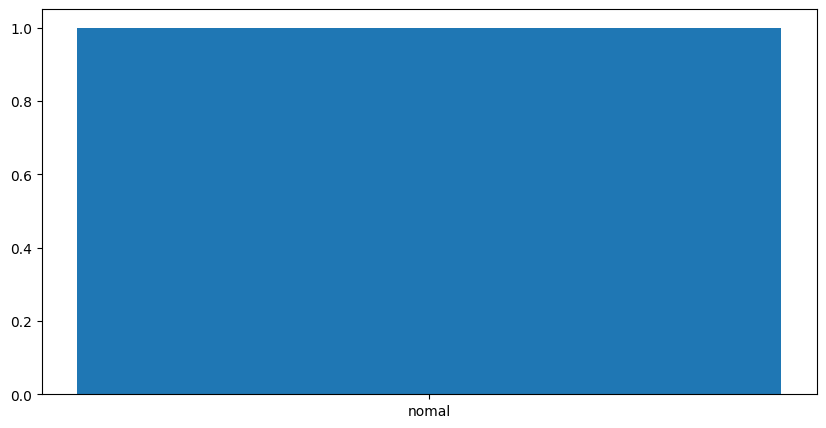

Batch 2 Label: {'nomal': tensor([1])}


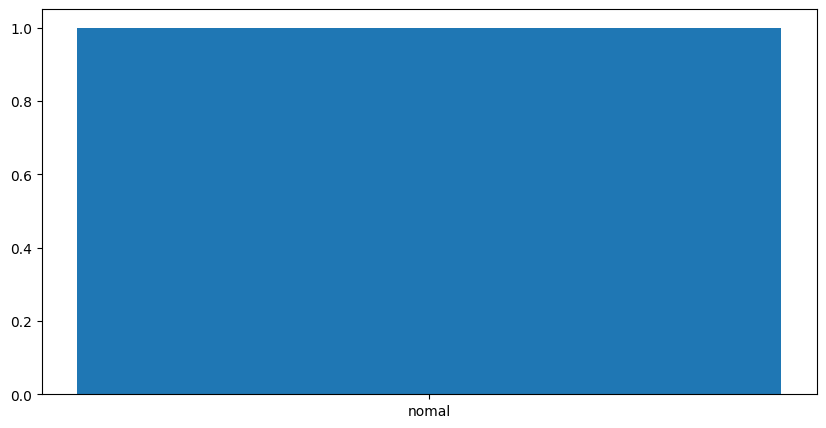

Batch 3 Label: {'nomal': tensor([1])}


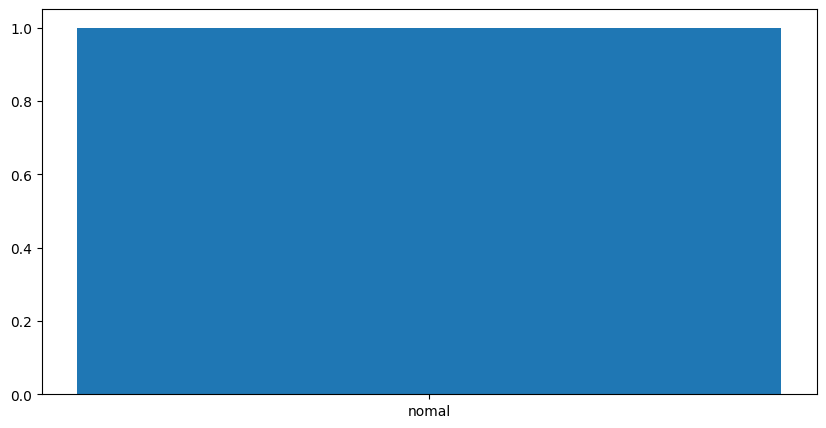

Batch 4 Label: {'shallow_scratch': tensor([7]), 'deep_scratch': tensor([4])}


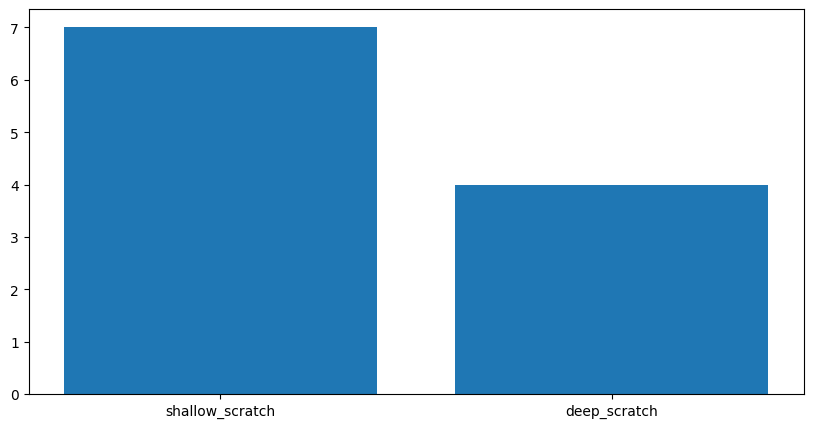

Batch 5 Label: {'shallow_scratch': tensor([2]), 'dent': tensor([1]), 'deep_scratch': tensor([1])}


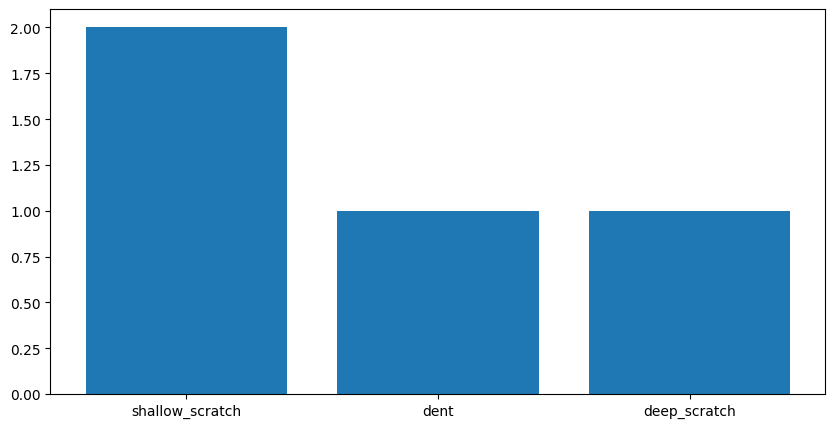

In [8]:
for i, (input, label) in enumerate(train_loader):
    # 첫 5개 배치에 대해서만 라벨 분포를 시각화
    if i < 5:
        print(f"Batch {i+1} Label: {label}")
        plt.figure(figsize=(10,5))
        plt.bar(label.keys(), label.values())  # 'status' 분포를 바 차트로 표현
        plt.show()
    else:
        break

[2] Transform (변환)

In [67]:
class ToTensor(object):
    def __call__(self, sample):
        image, label = sample

        # PIL Image나 numpy array를 텐서로 바꾸는 과정
        # 만약 이미지가 RGB라면 채널을 첫 번째 차원으로 이동
        image = torch.from_numpy(np.array(image).transpose((2, 0, 1))).float()

        # 라벨을 텐서로 변환
        label = torch.tensor(label)

        return image, label

class Normalization(object):
    def __init__(self, mean=0.5, std=0.5):
        self.mean = mean
        self.std = std

    def __call__(self, sample):
        image, label = sample

        # 이미지 정규화
        image = (image - self.mean) / self.std

        return image, label

class RandomFlip(object):
    def __call__(self, sample):
        image, label = sample

        # torch.Tensor를 numpy array로 바꿔줌
        image = image.numpy()

        if np.random.rand() > 0.5:
            image = np.fliplr(image)
            label = {k:np.fliplr(v) if isinstance(v, np.ndarray) else v for k,v in label.items()}

        if np.random.rand() > 0.5:
            image = np.flipud(image)
            label = {k:np.flipud(v) if isinstance(v, np.ndarray) else v for k,v in label.items()}

        # 다시 torch.Tensor로 바꿔줌
        image = torch.from_numpy(image)

        return image, label


In [16]:
# # 트랜스폼 구현
# transform = transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.5, std=0.5)])

# # 데이터셋 로딩
# dataset_train = CustomDataset(train_data, transform, root_dir=image_path)
# input, label = dataset_train.__getitem__(7) # 7번째 이미지와 레이블 가져오기

# # 불러온 레이블 시각화
# plt.figure(figsize=(10,5))

# plt.subplot(121)
# plt.bar(label.keys(), label.values()) # 각 'status'의 분포를 바 차트로 표현
# plt.title('Label distribution')
# plt.grid(True)  # 그래프에 그리드 추가

# # 불러온 이미지 시각화
# plt.subplot(122)
# plt.hist(input.flatten(), bins=20) # 이미지의 픽셀 분포를 히스토그램으로 표현
# plt.title('Pixel distribution of input image')
# plt.grid(True)  # 그래프에 그리드 추가

# plt.tight_layout()
# plt.show()

## 4. 네트워크(모델) 저장/불러오는 함수 정의하기<br>
* 진행 이유<br>
  - 훈련 과정의 시간이 오래 걸림 <br>
  - 예기치 않은 문제(ex. 파워 아웃, 시스템 오류 등)로 인한 중단 가능성<br>

 => 따라서 모델을 주기적으로 저장하고 필요할 때 불러오는 기능은 매우 유용


In [68]:
from google.colab import drive
import os
import torch

# 체크포인트를 저장할 디렉토리 경로
ckpt_dir = './drive/MyDrive/playdata_data/final_prj/unet_model'

# 모델 저장하기
def save(ckpt_dir, net, optim, epoch):
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)

    torch.save({'net': net.state_dict(), 'optim': optim.state_dict()},
               f"{ckpt_dir}/model_epoch{epoch}.pth")

# 모델 불러오기
def load(ckpt_dir, net, optim):
    if not os.path.exists(ckpt_dir):
        epoch = 0
        return net, optim, epoch

    ckpt_lst = os.listdir(ckpt_dir)

    if not ckpt_lst: # 체크포인트 디렉토리가 비어 있는 경우
        print("No saved model to load. Starting new training session.")
        return net, optim, 0

    ckpt_lst.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

    dict_model = torch.load('%s/%s' % (ckpt_dir, ckpt_lst[-1]))

    net.load_state_dict(dict_model['net'])
    optim.load_state_dict(dict_model['optim'])
    epoch = int(ckpt_lst[-1].split('epoch')[1].split('.pth')[0])

    return net, optim, epoch


## 5. 모델 학습

[1] 모델 파라미터 설정

In [69]:
from torch.utils.data import DataLoader

# 훈련 파라미터 설정하기
lr = 1e-3
batch_size = 4
num_epoch = 20

log_dir = './drive/MyDrive/playdata_data/final_prj/log'

# 데이터 로딩
with open(dir_data, 'r') as f:
    data = json.load(f)

# train, test 분할
keys = list(data.keys())
train_keys, valid_keys = train_test_split(keys, test_size=0.2, random_state=42)

# 데이터 추출
train_data = {key: data[key] for key in train_keys}
valid_data = {key: data[key] for key in valid_keys}

# 데이터 로딩 및 전처리
transform = transforms.Compose([
    # 데이터셋에 RGBA 이미지가 섞임
    transforms.Lambda(lambda image: image.convert("RGB")),
    # transforms.Resize((1024, 1024)), # 메모리 부족
    transforms.Resize((256, 256)),  # 모든 이미지를 256x256 크기로 변환
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

target_transform = transforms.Compose([
    transforms.Resize((256, 256)),  # 모든 이미지를 256x256 크기로 변환
    transforms.ToTensor(),
])

# 데이터 최종 정의
train_dataset = CustomDataset(train_data, transform, target_transform, root_dir=image_path)
valid_dataset = CustomDataset(valid_data, transform, target_transform, root_dir=image_path)

# DataLoader 정의
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# 모델 생성하기
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = UNet().to(device)  # UNet는 당신이 사용하는 모델에 따라 변경해야 합니다.

# 손실함수 정의하기
fn_loss = nn.BCEWithLogitsLoss().to(device)  # 이 손실함수는 이진 분류 문제에 사용하는데, 당신의 문제에 적합한지 확인해야 합니다.

# Optimizer 설정하기
optim = torch.optim.Adam(net.parameters(), lr=lr)

# 그밖에 부수적인 variables 설정하기
num_data_train = len(train_dataset)
num_data_val = len(valid_dataset)

num_batch_train = np.ceil(num_data_train / batch_size)
num_batch_val = np.ceil(num_data_val / batch_size)

# 그 밖에 부수적인 functions 설정하기
fn_tonumpy = lambda x: x.to('cpu').detach().numpy().transpose(0, 2, 3, 1)
fn_denorm = lambda x, mean, std: (x * std) + mean
fn_class = lambda x: 1.0 * (x > 0.5)

# Tensorboard 를 사용하기 위한 SummaryWriter 설정
writer_train = SummaryWriter(log_dir=os.path.join(log_dir, 'train'))
writer_val = SummaryWriter(log_dir=os.path.join(log_dir, 'val'))

In [18]:
# DataLoader 확인 : 모델의 출력과 타겟의 형태를 동일하게 만들기 위한 작업
num_epoch = 20

# label의 형태 확인 1차원 (그러나 2차원이어야 함)
for epoch in range(num_epoch):
    for data in train_loader:
        input = data['input'].to(device)
        label = data['label'].to(device)

        print("Label shape:", label.shape)
        break
    break

Label shape: torch.Size([4, 1, 256, 256])


In [19]:
# 이미지 크기가 동일하게 리사이징 됐는지 확인
# 임의의 데이터 샘플을 가져와서 변환
sample = train_dataset[0]  # 첫 번째 샘플을 가져옴
print(sample['input'].size())  # 변환 후 이미지의 크기를 출력

torch.Size([3, 256, 256])


[2] 모델 학습

In [70]:
# 모델 학습시키기
st_epoch = 0
# 학습한 모델이 있을 경우 모델 로드하기
net, optim, st_epoch = load(ckpt_dir=ckpt_dir, net=net, optim=optim)

for epoch in range(st_epoch + 1, num_epoch + 1):
    net.train()
    loss_arr = []

    for batch, data in enumerate(train_loader, 1):
        # forward pass
        label = data['label'].to(device)
        input = data['input'].to(device)

        output = net(input)

        # backward pass
        optim.zero_grad()

        loss = fn_loss(output, label)
        loss.backward()

        optim.step()

        # 손실함수 계산
        loss_arr += [loss.item()]

        print("TRAIN: EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f" %
              (epoch, num_epoch, batch, len(train_loader), np.mean(loss_arr)))

        # # Tensorboard 저장하기
        # 연산 추적을 중단하고 원본 텐서와 동일한 데이터를 가지는
        # 새로운 텐서를 생성한 후에 numpy 배열로 변환
        label = label.detach().cpu().numpy()
        input = input.detach().cpu().numpy()
        output = output.detach().cpu().numpy()

        # 단채널 -> 3채널로 늘리기
        label = expand_if_needed(label)
        input = expand_if_needed(input)
        output = expand_if_needed(output)

        writer_train.add_image('label', label, len(train_loader) * (epoch - 1) + batch, dataformats='NCHW')
        writer_train.add_image('input', input, len(train_loader) * (epoch - 1) + batch, dataformats='NCHW')
        writer_train.add_image('output', output, len(train_loader) * (epoch - 1) + batch, dataformats='NCHW')

    writer_train.add_scalar('loss', np.mean(loss_arr), epoch)

    with torch.no_grad():
        net.eval()
        loss_arr = []

        for batch, data in enumerate(valid_loader, 1):
            # forward pass
            label = data['label'].to(device)
            input = data['input'].to(device)

            output = net(input)

            # 손실함수 계산하기
            loss = fn_loss(output, label)

            loss_arr += [loss.item()]

            print("VALID: EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f" %
                  (epoch, num_epoch, batch, len(valid_loader), np.mean(loss_arr)))

            # Tensorboard 저장하기
            label = label.cpu().numpy()
            input = input.cpu().numpy()
            output = output.cpu().numpy()

            writer_val.add_image('label', label, len(valid_loader) * (epoch - 1) + batch, dataformats='NCHW')
            writer_val.add_image('input', input, len(valid_loader) * (epoch - 1) + batch, dataformats='NCHW')
            writer_val.add_image('output', output, len(valid_loader) * (epoch - 1) + batch, dataformats='NCHW')

    writer_val.add_scalar('loss', np.mean(loss_arr), epoch)

    # 모델 저장하기
    if epoch % 5 == 0:
        save(ckpt_dir=ckpt_dir, net=net, optim=optim, epoch=epoch)

    writer_train.close()
    writer_val.close()

No saved model to load. Starting new training session.
TRAIN: EPOCH 0001 / 0020 | BATCH 0001 / 0004 | LOSS 0.9669
TRAIN: EPOCH 0001 / 0020 | BATCH 0002 / 0004 | LOSS 0.9581
TRAIN: EPOCH 0001 / 0020 | BATCH 0003 / 0004 | LOSS 0.9447
TRAIN: EPOCH 0001 / 0020 | BATCH 0004 / 0004 | LOSS 0.9362
VALID: EPOCH 0001 / 0020 | BATCH 0001 / 0002 | LOSS 0.9484
VALID: EPOCH 0001 / 0020 | BATCH 0002 / 0002 | LOSS 0.9409
TRAIN: EPOCH 0002 / 0020 | BATCH 0001 / 0004 | LOSS 0.8839
TRAIN: EPOCH 0002 / 0020 | BATCH 0002 / 0004 | LOSS 0.8881
TRAIN: EPOCH 0002 / 0020 | BATCH 0003 / 0004 | LOSS 0.8785
TRAIN: EPOCH 0002 / 0020 | BATCH 0004 / 0004 | LOSS 0.8721
VALID: EPOCH 0002 / 0020 | BATCH 0001 / 0002 | LOSS 0.9573
VALID: EPOCH 0002 / 0020 | BATCH 0002 / 0002 | LOSS 0.9652
TRAIN: EPOCH 0003 / 0020 | BATCH 0001 / 0004 | LOSS 0.8463
TRAIN: EPOCH 0003 / 0020 | BATCH 0002 / 0004 | LOSS 0.8449
TRAIN: EPOCH 0003 / 0020 | BATCH 0003 / 0004 | LOSS 0.8547
TRAIN: EPOCH 0003 / 0020 | BATCH 0004 / 0004 | LOSS 0.8580
V

In [82]:
# 모델 학습이 끝난 후에 저장
save(ckpt_dir, net, optim, epoch)

In [35]:
# 오류 확인 (key값이 list인지 확인)
print(train_keys)
print(valid_keys)


['image_6358.jpg124869', 'image_8715.jpg193292', 'image_6343.jpg150214', 'image_a (8).jpg79809', 'image_a (4).jpg62914', 'image_10832.jpg67084', 'image_6240.jpg68850', 'image_6544.jpg822134', 'image_a (10).jpg55627', 'image_6352.jpg340366', 'image_10062.jpg96267', 'image_6382.jpg109001', 'image_6582.jpg790285', 'image_10860.jpg773498', 'image_a (9).jpg284027', 'image_6381.jpg120612']
['image_6236.jpg224218', 'image_a (5).jpg250336', 'image_a (2).jpg81770', 'image_6237.jpg184980', 'image_6538.jpg904723']


In [36]:
# data 딕셔너리에 존재하는 키인지 확인
print(all(key in data for key in train_keys))
print(all(key in data for key in valid_keys))

True
True


In [37]:
# CustomDataset 클래스가 각 아이템을 딕셔너리 형태로 반환하는지 확인
print(train_dataset[0])
print(valid_dataset[0])

TypeError: ignored

In [39]:
# root_dir 확인 (문제 확인)
print(f"Root directory: {train_dataset.root_dir}")

# 첫 번째 아이템의 정보 출력
first_item = train_dataset.data[0]
print(f"First item: {first_item}")

# 첫 번째 아이템의 이미지 파일 경로
first_image_path = os.path.join(train_dataset.root_dir, first_item['filename'])
print(f"First image path: {first_image_path}")

# 첫 번째 아이템의 이미지 불러와서 출력
from PIL import Image
first_image = Image.open(first_image_path)
first_image.show()


Root directory: None
First item: {'filename': 'image_6358.jpg', 'size': 124869, 'regions': [{'shape_attributes': {'name': 'polyline', 'all_points_x': [227, 546, 587, 601, 602, 607, 612, 607, 613, 604, 573, 420, 237, 207, 193, 187, 180, 180, 185, 185, 177, 178, 183, 183, 176, 177, 185, 185, 201, 230], 'all_points_y': [111, 105, 125, 156, 301, 300, 404, 402, 921, 941, 963, 966, 967, 951, 929, 424, 420, 360, 362, 347, 346, 282, 281, 261, 260, 225, 225, 151, 124, 111]}, 'region_attributes': {'side': 'front', 'status': 'nomal'}}], 'file_attributes': {}}


TypeError: ignored

In [42]:
# root_dir 오류 수정 후 customdataset 작동 확인
# 첫 번째 훈련 데이터 확인
first_train_item = train_dataset[0]
print(f"First train item: {first_train_item}")

# 첫 번째 검증 데이터 확인
first_valid_item = valid_dataset[0]
print(f"First valid item: {first_valid_item}")

First train item: (tensor([[[0.8667, 0.9059, 0.9137,  ..., 0.7412, 0.7569, 0.7725],
         [0.8510, 0.8902, 0.8980,  ..., 0.7647, 0.7569, 0.7569],
         [0.8510, 0.8745, 0.8824,  ..., 0.7647, 0.7569, 0.7569],
         ...,
         [0.7569, 0.6784, 0.7412,  ..., 0.7804, 0.8196, 0.7804],
         [0.8510, 0.7882, 0.8667,  ..., 0.8196, 0.8902, 0.8902],
         [0.4667, 0.4196, 0.5294,  ..., 0.4353, 0.5529, 0.6078]],

        [[0.8510, 0.8902, 0.8980,  ..., 0.7020, 0.7176, 0.7333],
         [0.8353, 0.8745, 0.8824,  ..., 0.7255, 0.7176, 0.7176],
         [0.8353, 0.8588, 0.8667,  ..., 0.7255, 0.7176, 0.7176],
         ...,
         [0.6941, 0.6157, 0.6784,  ..., 0.7255, 0.7647, 0.7255],
         [0.7961, 0.7333, 0.8118,  ..., 0.7647, 0.8353, 0.8353],
         [0.4039, 0.3569, 0.4667,  ..., 0.3804, 0.4980, 0.5529]],

        [[0.7490, 0.7882, 0.7961,  ..., 0.5451, 0.5608, 0.5765],
         [0.7333, 0.7725, 0.7804,  ..., 0.5686, 0.5608, 0.5608],
         [0.7333, 0.7569, 0.7647,  ...,

## 6. 모델 결과 시각화

* test data (valid data)

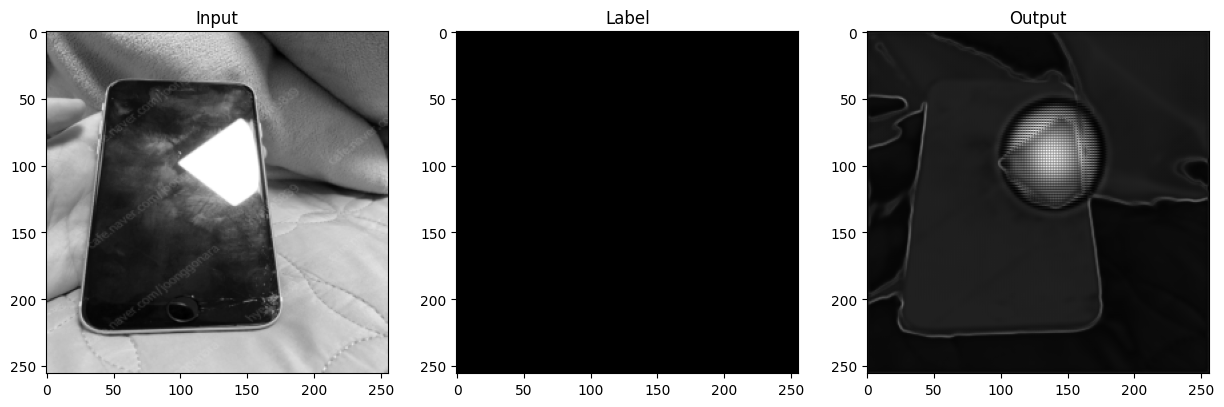

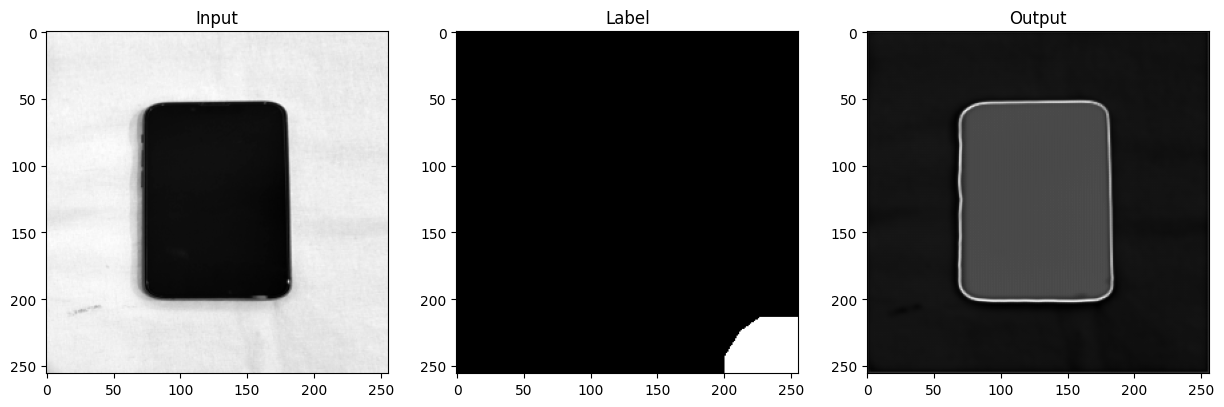

In [81]:
# 테스트 데이터 로더에서 5개의 배치를 가져옵니다.
for i, data in enumerate(valid_loader, 0):
    if i > 4:
        break
    input = data['input'].to(device)
    label = data['label'].to(device)

    # 모델에 입력을 전달하여 출력을 계산
    output = net(input)

    # GPU에서 CPU로 데이터를 이동하고 tensor를 numpy 배열로 변환
    input = input.cpu().numpy()
    label = label.cpu().numpy()
    output = output.detach().cpu().numpy()

    # 모델의 출력을 시각화
    import matplotlib.pyplot as plt

    # 입력, 실제 라벨, 모델 출력.
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    input = np.transpose(input[0], (1, 2, 0))  # (C, H, W) --> (H, W, C)
    gray_input = np.dot(input[...,:3], [0.2989, 0.5870, 0.1140])  # RGB to gray
    ax[0].imshow(gray_input, cmap='gray')
    ax[0].set_title('Input')

    ax[1].imshow(np.squeeze(label[0]), cmap='gray')  # Directly visualize the grayscale label
    ax[1].set_title('Label')

    ax[2].imshow(np.squeeze(output[0]), cmap='gray')  # Directly visualize the grayscale output
    ax[2].set_title('Output')

    plt.show()

# label = np.transpose(label[0], (1, 2, 0))  # (C, H, W) --> (H, W, C)
# gray_label = np.dot(label[...,:3], [0.2989, 0.5870, 0.1140])  # RGB to gray
# ax[1].imshow(gray_label, cmap='gray')
# ax[1].set_title('Label')

# output = np.transpose(output[0], (1, 2, 0))  # (C, H, W) --> (H, W, C)
# gray_output = np.dot(output[...,:3], [0.2989, 0.5870, 0.1140])  # RGB to gray
# ax[2].imshow(gray_output, cmap='gray')
# ax[2].set_title('Output')

# plt.show()

* train data

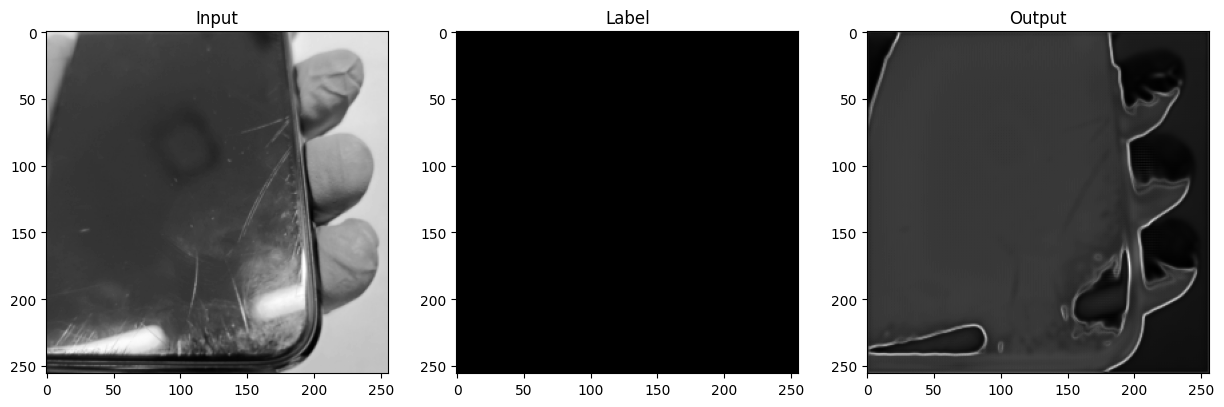

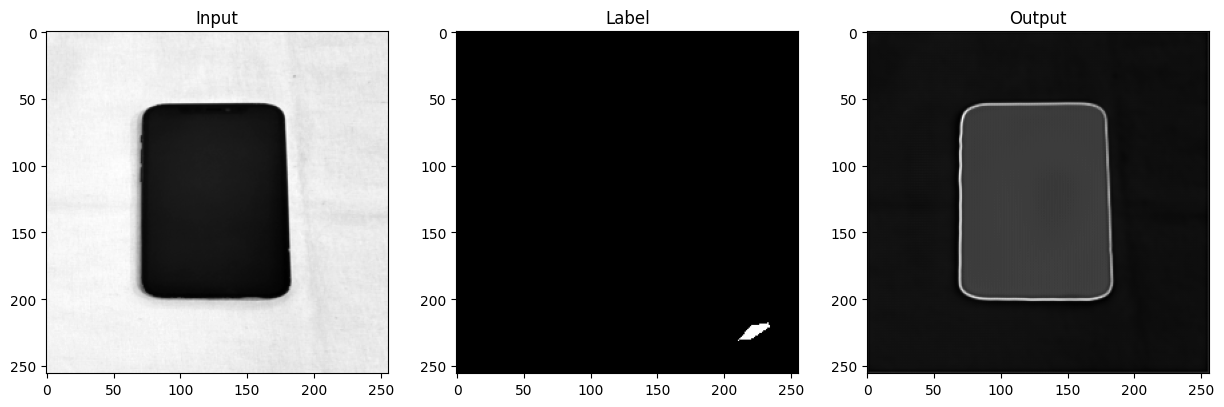

Not enough batches in the DataLoader


In [80]:
# Iterator 생성
data_iter = iter(train_loader)

# 첫 두 배치 건너뛰기
for i in range(2):
    try:
        next(data_iter)
    except StopIteration:
        print("Not enough batches in the DataLoader")
        break

# 그 다음 4개 배치 시각화
for i in range(4):
    try:
        data = next(data_iter)
    except StopIteration:
        print("Not enough batches in the DataLoader")
        break

    input = data['input'].to(device)
    label = data['label'].to(device)

    # 모델에 입력을 전달하여 출력을 계산
    output = net(input)

    # GPU에서 CPU로 데이터를 이동하고 tensor를 numpy 배열로 변환
    input = input.cpu().numpy()
    label = label.cpu().numpy()
    output = output.detach().cpu().numpy()

    # 모델의 출력을 시각화
    import matplotlib.pyplot as plt

    # 입력, 실제 라벨, 모델 출력.
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    input = np.transpose(input[0], (1, 2, 0))  # (C, H, W) --> (H, W, C)
    gray_input = np.dot(input[...,:3], [0.2989, 0.5870, 0.1140])  # RGB to gray
    ax[0].imshow(gray_input, cmap='gray')
    ax[0].set_title('Input')

    ax[1].imshow(np.squeeze(label[0]), cmap='gray')  # Directly visualize the grayscale label
    ax[1].set_title('Label')

    ax[2].imshow(np.squeeze(output[0]), cmap='gray')  # Directly visualize the grayscale output
    ax[2].set_title('Output')

    plt.show()

## 7. 테스트 실시

1차 test

In [91]:
test_image = './drive/MyDrive/playdata_data/final_prj/test/image_472.jpg'

# 이미지 불러오기
img = Image.open(test_image)

# 이미지 전처리
transform = transforms.Compose([
    # 데이터셋에 RGBA 이미지가 섞임
    transforms.Lambda(lambda image: image.convert("RGB")),
    transforms.Resize((256, 256)),  # 모든 이미지를 256x256 크기로 변환
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img_tensor = transform(img).unsqueeze(0)

In [92]:
# 평가 모드로 설정
net.eval()

# 이미지를 GPU로 이동
img_tensor = img_tensor.to(device)

# 예측 수행
with torch.no_grad():
    prediction = net(img_tensor)

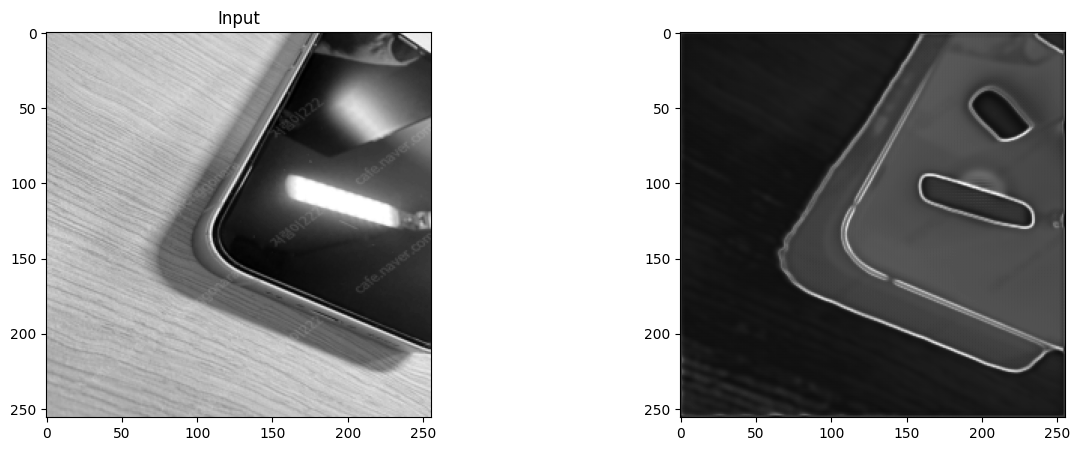

In [93]:
# 예측 결과를 CPU로 이동하고 tensor를 numpy 배열로 변환
prediction = prediction.cpu().numpy()

# 예측 결과를 CPU로 이동하고 tensor를 numpy 배열로 변환
input_image = img_tensor.cpu().numpy()

# 이미 label이 numpy 배열로 변환되었다면, 다음 줄은 필요 없습니다.
# label_image = label.cpu().numpy()

# label 데이터가 있는 경우
label_image = label  # 이미 numpy 배열일 것으로 가정

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Input 이미지 시각화
input_image = np.transpose(input_image[0], (1, 2, 0))  # (C, H, W) --> (H, W, C)
gray_input = np.dot(input_image[...,:3], [0.2989, 0.5870, 0.1140])  # RGB to gray
ax[0].imshow(gray_input, cmap='gray')
ax[0].set_title('Input')

# 예측 결과 시각화
plt.imshow(prediction[0, 0], cmap='gray')

plt.show()

In [95]:
prediction = np.argmax(prediction, axis=-1)

# 가장 흔한 레이블 찾기
unique, counts = np.unique(prediction, return_counts=True)
most_common_label_index = np.argmax(counts)
most_common_label = unique[most_common_label_index]

# 레이블 딕셔너리
label_dict = {"normal": 0, "shallow_scratch": 1, "deep_scratch": 2, "dent": 3, "spacing" : 4}

# 역으로 레이블 찾기
label_dict_inv = {v: k for k, v in label_dict.items()}
most_common_label_str = label_dict_inv[most_common_label]

print(f"The most common label in the image is: {most_common_label_str}")

The most common label in the image is: normal


2차 test

In [99]:
test_path = './drive/MyDrive/playdata_data/final_prj/test/'
test_image = test_path + 'image_1b23.jpg'

# 이미지 불러오기
img = Image.open(test_image)

# 이미지 전처리
transform = transforms.Compose([
    # 데이터셋에 RGBA 이미지가 섞임
    transforms.Lambda(lambda image: image.convert("RGB")),
    transforms.Resize((256, 256)),  # 모든 이미지를 256x256 크기로 변환
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img_tensor = transform(img).unsqueeze(0)

# 평가 모드로 설정
net.eval()

# 이미지를 GPU로 이동
img_tensor = img_tensor.to(device)

# 예측 수행
with torch.no_grad():
    prediction = net(img_tensor)

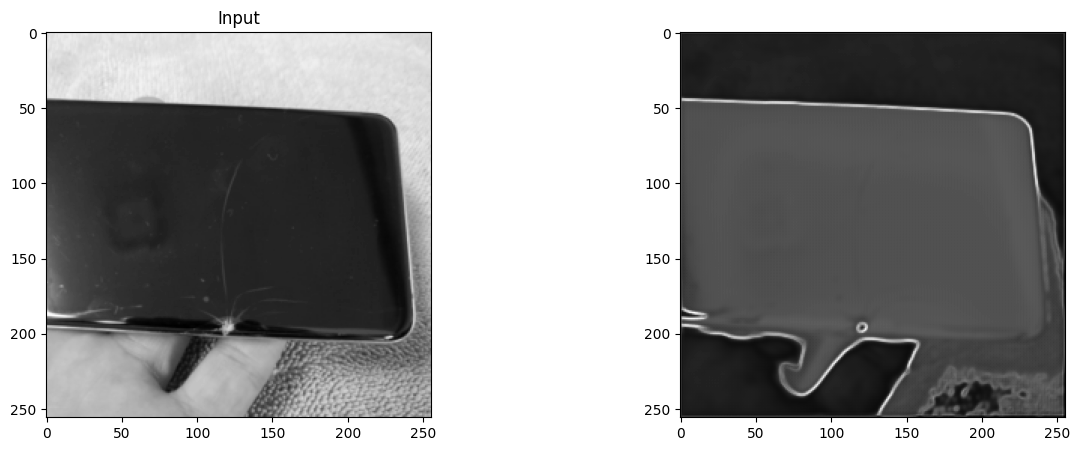

In [100]:
# 예측 결과를 CPU로 이동하고 tensor를 numpy 배열로 변환
prediction = prediction.cpu().numpy()

# 예측 결과를 CPU로 이동하고 tensor를 numpy 배열로 변환
input_image = img_tensor.cpu().numpy()

# 이미 label이 numpy 배열로 변환되었다면, 다음 줄은 필요 없습니다.
# label_image = label.cpu().numpy()

# label 데이터가 있는 경우
label_image = label  # 이미 numpy 배열일 것으로 가정

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Input 이미지 시각화
input_image = np.transpose(input_image[0], (1, 2, 0))  # (C, H, W) --> (H, W, C)
gray_input = np.dot(input_image[...,:3], [0.2989, 0.5870, 0.1140])  # RGB to gray
ax[0].imshow(gray_input, cmap='gray')
ax[0].set_title('Input')

# 예측 결과 시각화
plt.imshow(prediction[0, 0], cmap='gray')

plt.show()

In [101]:
prediction = np.argmax(prediction, axis=-1)

# 가장 흔한 레이블 찾기
unique, counts = np.unique(prediction, return_counts=True)
most_common_label_index = np.argmax(counts)
most_common_label = unique[most_common_label_index]

# 레이블 딕셔너리
label_dict = {"normal": 0, "shallow_scratch": 1, "deep_scratch": 2, "dent": 3, "spacing" : 4}

# 역으로 레이블 찾기
label_dict_inv = {v: k for k, v in label_dict.items()}
most_common_label_str = label_dict_inv[most_common_label]

print(f"The most common label in the image is: {most_common_label_str}")

The most common label in the image is: normal
